## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [7]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

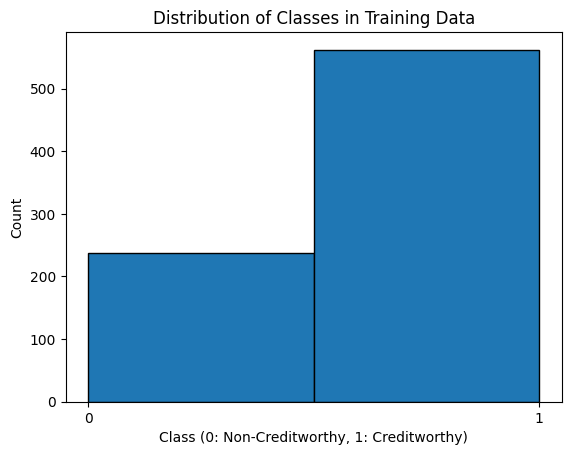

In [9]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [10]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.68
Accuracy: 0.76
Precision: 0.78
Recall: 0.90

Gradient Boosting метрики:
ROC AUC: 0.67
Accuracy: 0.73
Precision: 0.79
Recall: 0.84


In [11]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.56
Accuracy: 0.65
Precision: 0.72
Recall: 0.79


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

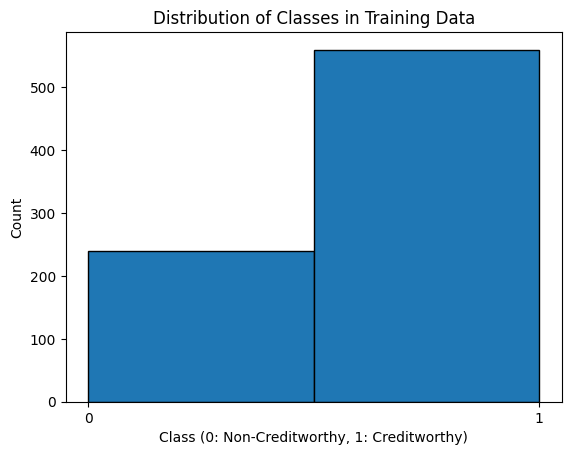

Распределение классов в обучающей выборке: [240 560]
Распределение классов в тестовой выборке: [ 60 140]
Обучение Random Forest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Лучшие параметры Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Random Forest (оптимизированный) метрики:
ROC AUC: 0.8274
Accuracy: 0.8000
Precision: 0.8086
Recall: 0.9357
Обучение Gradient Boosting...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Лучшие параметры Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}

Gradient Boosting (оптимизированный) метрики:
ROC AUC: 0.8368
Accuracy: 0.8100
Precision: 0.8312
Recall: 0.9143
Обучение MLP нейронной сети...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Лучшие параметры MLP: {'mlp__alpha': 0.001, 'mlp__batch_size': 32, 'mlp__hidden_layer_size

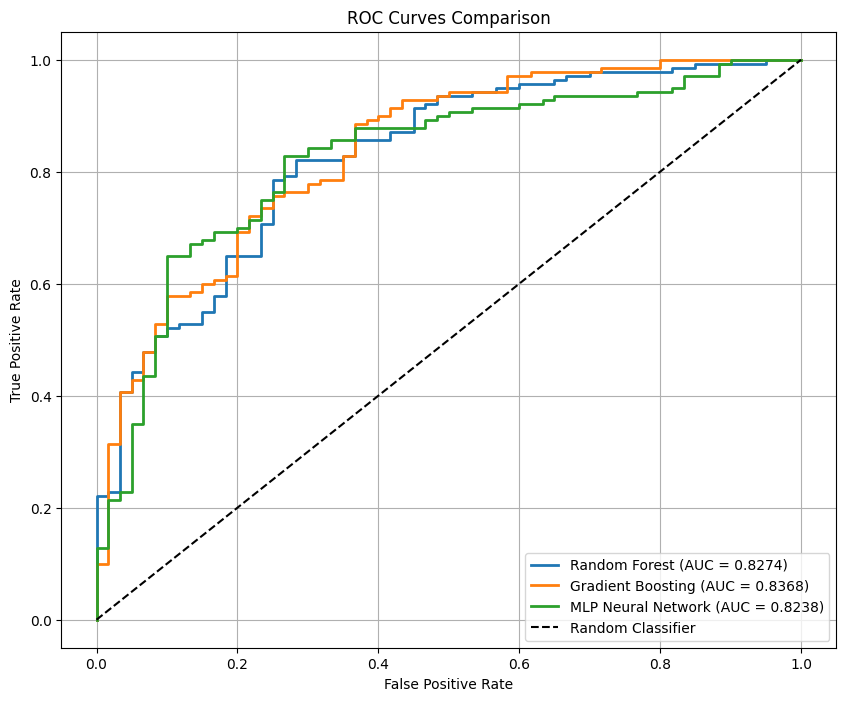

ЛУЧШАЯ МОДЕЛЬ: Gradient Boosting с ROC-AUC = 0.8368


In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Загрузка данных
data = pd.read_csv('german.csv', sep=';')
print(data.head())
print(f"Размер данных: {data.shape}")

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Визуализация распределения классов
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

print(f"Распределение классов в обучающей выборке: {np.bincount(y_train)}")
print(f"Распределение классов в тестовой выборке: {np.bincount(y_test)}")

# Функция для оценки моделей
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"\n{model_name} метрики:")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    return roc_auc, y_pred_proba

# 1. Random Forest с оптимизацией гиперпараметров
print("=" * 50)
print("Обучение Random Forest...")

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

print(f"Лучшие параметры Random Forest: {rf_grid.best_params_}")
best_rf_model = rf_grid.best_estimator_
rf_auc, rf_proba = evaluate_model(best_rf_model, X_test, y_test, "Random Forest (оптимизированный)")

# 2. Gradient Boosting с оптимизацией гиперпараметров
print("=" * 50)
print("Обучение Gradient Boosting...")

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9, 1.0]
}

gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
gb_grid.fit(X_train, y_train)

print(f"Лучшие параметры Gradient Boosting: {gb_grid.best_params_}")
best_gb_model = gb_grid.best_estimator_
gb_auc, gb_proba = evaluate_model(best_gb_model, X_test, y_test, "Gradient Boosting (оптимизированный)")

# 3. MLP нейронная сеть с оптимизацией и стандартизацией
print("=" * 50)
print("Обучение MLP нейронной сети...")

# Создаем pipeline со стандартизацией
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42, max_iter=1000, early_stopping=True))
])

mlp_param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate_init': [0.001, 0.01],
    'mlp__batch_size': [32, 64]
}

mlp_grid = GridSearchCV(mlp_pipeline, mlp_param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
mlp_grid.fit(X_train, y_train)

print(f"Лучшие параметры MLP: {mlp_grid.best_params_}")
best_mlp_model = mlp_grid.best_estimator_
mlp_auc, mlp_proba = evaluate_model(best_mlp_model, X_test, y_test, "MLP Neural Network (оптимизированный)")

# Сравнение ROC-AUC всех моделей
print("=" * 50)
print("СРАВНЕНИЕ МОДЕЛЕЙ:")
print(f"Random Forest ROC-AUC: {rf_auc:.4f}")
print(f"Gradient Boosting ROC-AUC: {gb_auc:.4f}")
print(f"MLP Neural Network ROC-AUC: {mlp_auc:.4f}")

# Визуализация ROC кривых
plt.figure(figsize=(10, 8))

for model, proba, name in [(best_rf_model, rf_proba, 'Random Forest'),
                          (best_gb_model, gb_proba, 'Gradient Boosting'),
                          (best_mlp_model, mlp_proba, 'MLP Neural Network')]:
    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc_score(y_test, proba):.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Определение лучшей модели
models_auc = {
    'Random Forest': rf_auc,
    'Gradient Boosting': gb_auc,
    'MLP Neural Network': mlp_auc
}

best_model_name = max(models_auc, key=models_auc.get)
best_auc = models_auc[best_model_name]

print("=" * 50)
print(f"ЛУЧШАЯ МОДЕЛЬ: {best_model_name} с ROC-AUC = {best_auc:.4f}")

